In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import warnings

import matplotlib as mpl
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from rcpl.config import FIGURES_DIR, MPL_RC, CONFIGS_DIR
from rcpl.prediction import ChainPredictor

mpl.rcParams.update(MPL_RC)
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

In [58]:
gru_predictor = ChainPredictor(config_path=CONFIGS_DIR / 'maftr/maftr2_4.best/gru.yaml', predicts_scaled_theta=True)
ttopt_predictor = ChainPredictor(config_path=CONFIGS_DIR / 'maftr/maftr2_4.best/ttopt.yaml', predicts_scaled_theta=False)

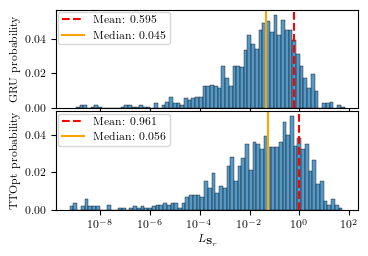

In [59]:
data_sets = [
    gru_predictor.chain.model_metrics.value['simplex_data']['x_l2/val'],
    ttopt_predictor.chain.model_metrics.value['simplex_data']['x_l2/val'],
]
labels=['GRU', 'TTOpt']

# Create figure and axes for the subplots
fig, axes = plt.subplots(len(data_sets), 1, figsize=(3.9, 1.3*len(data_sets)), sharex=True)

for i, ax in enumerate(axes):
    sns.histplot(data_sets[i], stat='probability', binwidth=0.15, log_scale=(True, False), ax=ax)
    mean_value = np.mean(data_sets[i])
    median_value = np.median(data_sets[i])
    ax.axvline(mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.3f}')
    ax.axvline(median_value, color='orange', linestyle='-', label=f'Median: {median_value:.3f}')
    ax.legend(frameon=True, labelspacing=0.5, handlelength=2, fontsize=8, borderpad=0.3, columnspacing=1, borderaxespad=0.2)
    ax.set_ylabel(f'{labels[i]} probability')

# Set common labels
plt.xlabel(r'$L_{\textbf{S}_r}$')
plt.subplots_adjust(hspace=0.03)
plt.savefig(FIGURES_DIR / f'prediction_hist.pdf', bbox_inches='tight', pad_inches=0)

plt.show()